In [3]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [21]:
tickers=['PG','MSFT', 'F','GE']
mydata=pd.DataFrame()
for t in tickers:
    mydata[t]=wb.DataReader(t, data_source='yahoo', start='1995-1-1')['Adj Close']

In [26]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6928 entries, 1995-01-03 to 2022-07-08
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      6928 non-null   float64
 1   MSFT    6928 non-null   float64
 2   F       6928 non-null   float64
 3   GE      6928 non-null   float64
dtypes: float64(4)
memory usage: 270.6 KB


In [27]:
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
2022-07-01,146.110001,259.579987,11.32,63.540001
2022-07-05,144.699997,262.850006,11.20,62.029999
2022-07-06,146.050003,266.209991,11.06,61.570000
2022-07-07,146.000000,268.399994,11.65,63.000000
2022-07-08,145.020004,267.660004,11.62,63.250000


In [30]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,7.926648,2.364446,4.307283,32.808636
1995-01-04,7.863114,2.381634,4.423176,32.808636
1995-01-05,7.751913,2.342350,4.384546,32.889046
1995-01-06,7.767798,2.381634,4.384546,32.728218
1995-01-09,7.736029,2.366902,4.461809,32.406574


In [31]:
mydata.iloc[0]

PG       7.926648
MSFT     2.364446
F        4.307283
GE      32.808636
Name: 1995-01-03 00:00:00, dtype: float64

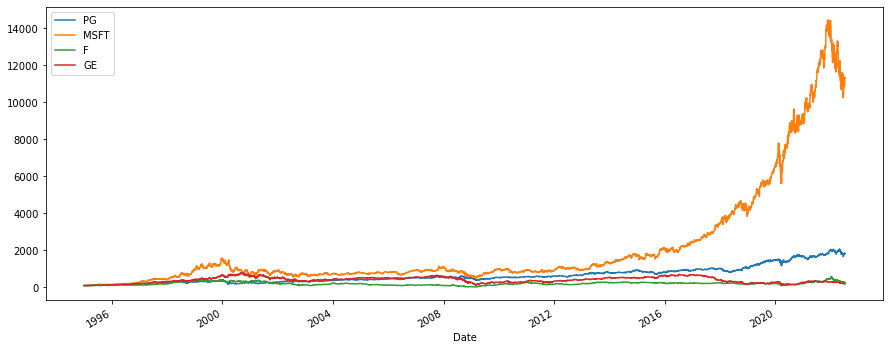

In [34]:
(mydata/mydata.iloc[0]*100).plot(figsize=(15,6))
plt.show()

In [35]:
mydata.loc['1995-01-03']

PG       7.926648
MSFT     2.364446
F        4.307283
GE      32.808636
Name: 1995-01-03 00:00:00, dtype: float64

In [36]:
mydata.iloc[0]

PG       7.926648
MSFT     2.364446
F        4.307283
GE      32.808636
Name: 1995-01-03 00:00:00, dtype: float64

In [40]:
returns=(mydata/mydata.shift(1))-1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008015,0.007269,0.026906,0.000000
1995-01-05,-0.014142,-0.016494,-0.008734,0.002451
1995-01-06,0.002049,0.016771,0.000000,-0.004890
1995-01-09,-0.004090,-0.006186,0.017622,-0.009828


In [41]:
#Calculate the return of a Portfolio of Securities

In [42]:
weights=np.array([0.25, 0.25, 0.25, 0.25])

In [43]:
np.dot(returns, weights)

array([        nan,  0.00653999, -0.00922975, ...,  0.00054922,
        0.02111379, -0.00201904])

In [44]:
annual_returns=returns.mean()*250

In [45]:
annual_returns

PG      0.130008
MSFT    0.219860
F       0.116620
GE      0.075335
dtype: float64

In [46]:
np.dot(annual_returns, weights)

0.13545576998747869

In [56]:
portfolio1=str(round(np.dot(annual_returns, weights),4)*100)+'%'

In [57]:
print(portfolio1)

13.55%


In [58]:
weights_2=np.array([0.4,0.4,0.15,0.05])

In [59]:
portfolio2=str(round(np.dot(annual_returns, weights_2),4)*100)+'%'
print(portfolio1)
print(portfolio2)

13.55%
16.12%
